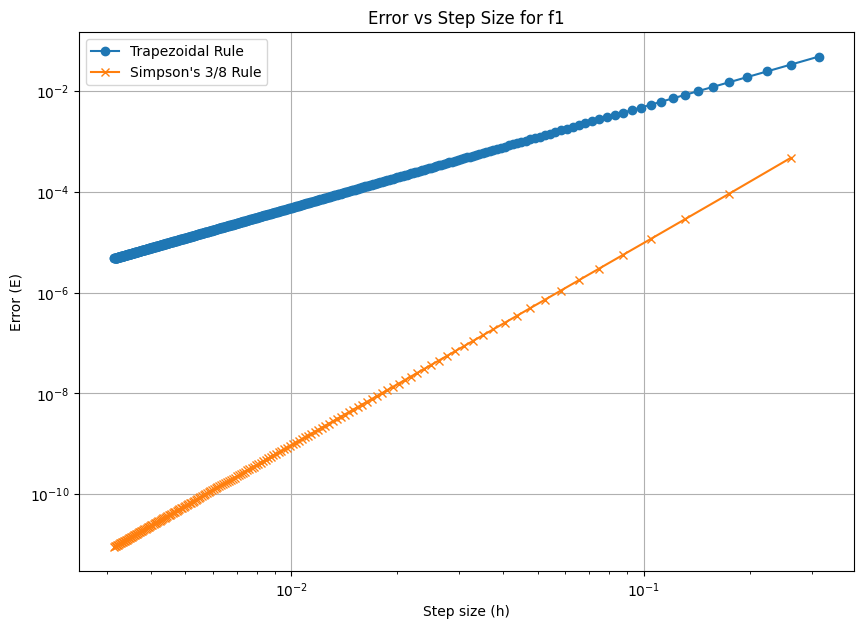

In [1]:
# Establish functions, Trapezoidal Rule, Simpson’s 3/8 Rule

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Trapezoidal, h= (b-a)/ n, same for Simpson'S

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))

    for i in range(1, n):
        x = a + i * h
        integral += f(x)
    return integral * h


# Simpson'S

def simpsons_3_8_rule(f, a, b, n):
     if n % 3 != 0:
        raise ValueError("n must be multiple of 3")
     h = (b - a) / n
     integral = f(a) + f(b)
     for i in range(1, n):
        x = a + i * h
        if i % 3 == 0:
            integral += 2 * f(x)
        else:
            integral += 3 * f(x)
     return (3 * h / 8) * integral

# Comparison

def f1(x):
    return np.exp(x) * np.cos(x)

def f2(x):
    return np.exp(x)

def f3(x):
    if x < 0:
        return np.exp(2 * x)
    else:
        return x / (x - 2 * np.cos(x) + 4)
f3_vectorized = np.vectorize(f3)

# Integrals with scipy.quad func
analytical_f1, _ = quad(f1, 0, np.pi / 2)
analytical_f2, _ = quad(f2, -1, 3)
analytical_f3, _ = quad(f3_vectorized, -1, 1)

# Values
n_values = range(5, 502)
errors_trapezoidal = []
errors_simpsons = []
h_values = []

# f1

for n in n_values:
    h = (np.pi / 2) / n  
    h_values.append(h)

    # Trapezoidal Rule
    num_trapezoidal = trapezoidal_rule(f1, 0, np.pi / 2, n)
    errors_trapezoidal.append(abs(analytical_f1 - num_trapezoidal))
    
    # Simpson's
    # n = multiples of 3
    if n % 3 == 0:
        num_simpsons = simpsons_3_8_rule(f1, 0, np.pi / 2, n)
        errors_simpsons.append(abs(analytical_f1 - num_simpsons))
    else:
        errors_simpsons.append(None) 

plt.figure(figsize=(10, 7))
plt.loglog(h_values, errors_trapezoidal, label='Trapezoidal Rule', marker='o')
plt.loglog(
    [h_values[i] for i in range(len(n_values)) if n_values[i] % 3 == 0],
    [e for e in errors_simpsons if e is not None],
    label="Simpson's 3/8 Rule",
    marker='x'
)
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title('Error vs Step Size for f1')
plt.legend()
plt.grid()
plt.show()


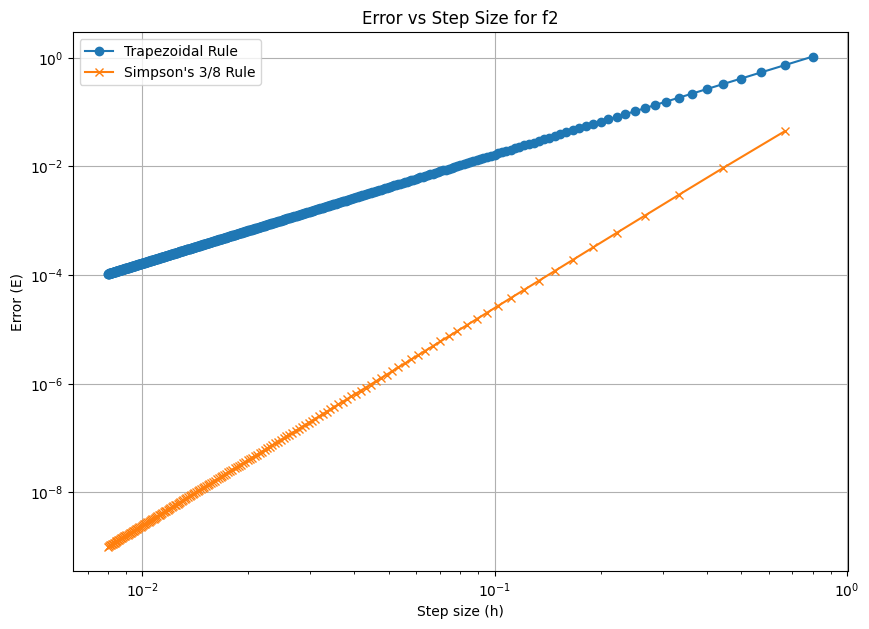

In [2]:
# f2

analytical_f2, _ = quad(f2, -1, 3)

n_values = range(5, 502)
errors_trapezoidal_f2 = []
errors_simpsons_f2 = []
h_values_f2 = []

for n in n_values:
    h = (3 - (-1)) / n  
    h_values_f2.append(h)
    
    # Trapezoidal Rule
    num_trapezoidal_f2 = trapezoidal_rule(f2, -1, 3, n)
    errors_trapezoidal_f2.append(abs(analytical_f2 - num_trapezoidal_f2))
    
    # Simpson's
    if n % 3 == 0:  
        num_simpsons_f2 = simpsons_3_8_rule(f2, -1, 3, n)
        errors_simpsons_f2.append(abs(analytical_f2 - num_simpsons_f2))
    else:
        errors_simpsons_f2.append(None)  

plt.figure(figsize=(10, 7))
plt.loglog(h_values_f2, errors_trapezoidal_f2, label='Trapezoidal Rule', marker='o')
plt.loglog(
    [h_values_f2[i] for i in range(len(n_values)) if n_values[i] % 3 == 0],
    [e for e in errors_simpsons_f2 if e is not None],
    label="Simpson's 3/8 Rule",
    marker='x'
)
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title('Error vs Step Size for f2')
plt.legend()
plt.grid()
plt.show()


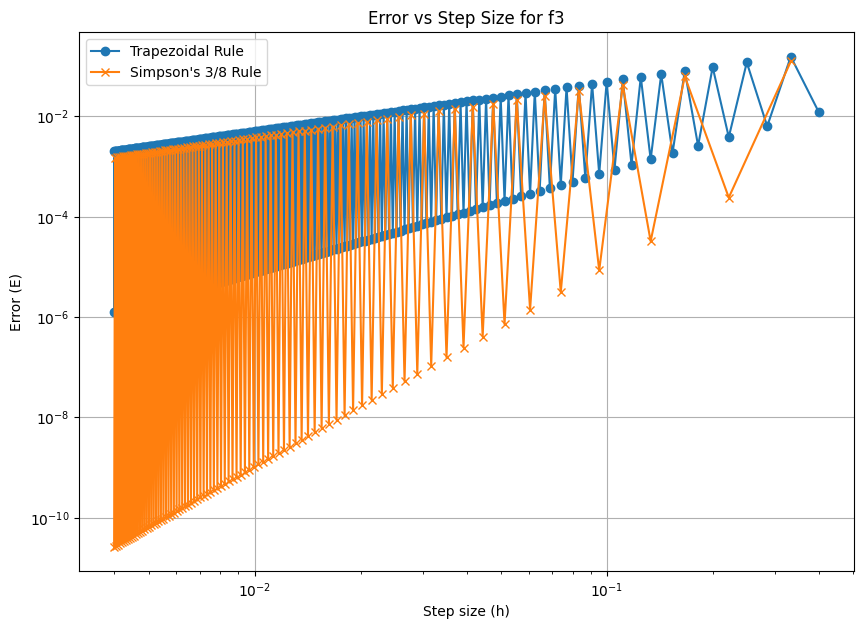

In [3]:
# f3

def f3(x):
    if x < 0:
        return np.exp(2 * x)
    else:
        return x / (x - 2 * np.cos(x) + 4)

f3_vectorized = np.vectorize(f3)

analytical_f3, _ = quad(f3_vectorized, -1, 1)

n_values = range(5, 502)
errors_trapezoidal_f3 = []
errors_simpsons_f3 = []
h_values_f3 = []

for n in n_values:
    h = (1 - (-1)) / n  
    h_values_f3.append(h)
    
    # Trapezoidal Rule
    num_trapezoidal_f3 = trapezoidal_rule(f3, -1, 1, n)
    errors_trapezoidal_f3.append(abs(analytical_f3 - num_trapezoidal_f3))
    
    # Simpson's
    if n % 3 == 0:
        num_simpsons_f3 = simpsons_3_8_rule(f3, -1, 1, n)
        errors_simpsons_f3.append(abs(analytical_f3 - num_simpsons_f3))
    else:
        errors_simpsons_f3.append(None)  

plt.figure(figsize=(10, 7))
plt.loglog(h_values_f3, errors_trapezoidal_f3, label='Trapezoidal Rule', marker='o')
plt.loglog(
    [h_values_f3[i] for i in range(len(n_values)) if n_values[i] % 3 == 0],
    [e for e in errors_simpsons_f3 if e is not None],
    label="Simpson's 3/8 Rule",
    marker='x'
)
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title('Error vs Step Size for f3')
plt.legend()
plt.grid()
plt.show()

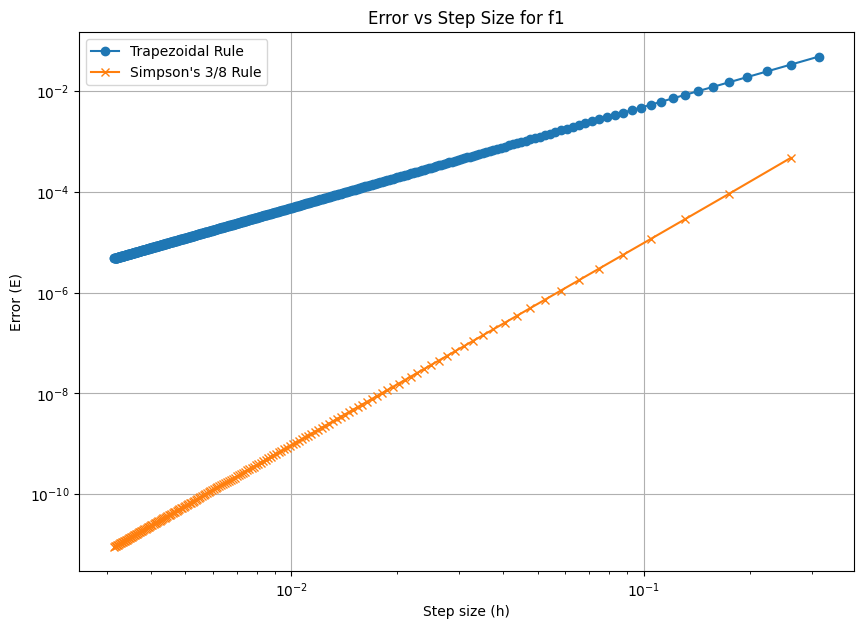

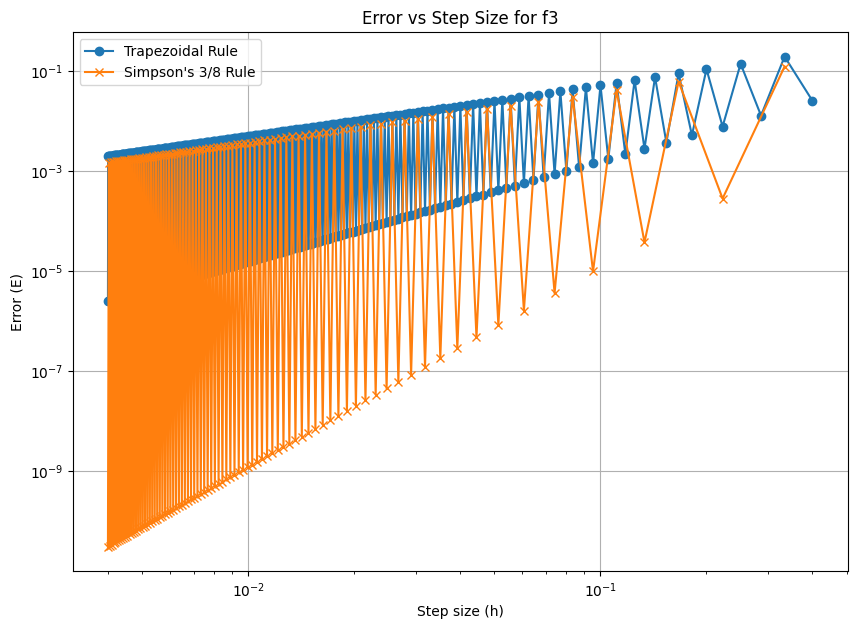

In [4]:
# here i realized i used wrong equation for f3, so this is the corrected version

# Establish functions, Trapezoidal Rule, Simpson’s 3/8 Rule

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Trapezoidal, h= (b-a)/ n, same for Simpson'S

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))

    for i in range(1, n):
        x = a + i * h
        integral += f(x)
    return integral * h


# Simpson'S

def simpsons_3_8_rule(f, a, b, n):
     if n % 3 != 0:
        raise ValueError("n must be multiple of 3")
     h = (b - a) / n
     integral = f(a) + f(b)
     for i in range(1, n):
        x = a + i * h
        if i % 3 == 0:
            integral += 2 * f(x)
        else:
            integral += 3 * f(x)
     return (3 * h / 8) * integral

# Comparison

def f1(x):
    return np.exp(x) * np.cos(x)

def f2(x):
    return np.exp(x)

def f3(x):
    if x < 0:
        return np.exp(2 * x)
    else:
        return x - 2 * np.cos(x) + 4
f3_vectorized = np.vectorize(f3)

# Integrals with scipy.quad func
analytical_f1, _ = quad(f1, 0, np.pi / 2)
analytical_f2, _ = quad(f2, -1, 3)
analytical_f3, _ = quad(f3_vectorized, -1, 1)

# Values
n_values = range(5, 502)
errors_trapezoidal = []
errors_simpsons = []
h_values = []

# f1

for n in n_values:
    h = (np.pi / 2) / n  
    h_values.append(h)

    # Trapezoidal Rule
    num_trapezoidal = trapezoidal_rule(f1, 0, np.pi / 2, n)
    errors_trapezoidal.append(abs(analytical_f1 - num_trapezoidal))
    
    # Simpson's
    # n = multiples of 3
    if n % 3 == 0:
        num_simpsons = simpsons_3_8_rule(f1, 0, np.pi / 2, n)
        errors_simpsons.append(abs(analytical_f1 - num_simpsons))
    else:
        errors_simpsons.append(None) 

plt.figure(figsize=(10, 7))
plt.loglog(h_values, errors_trapezoidal, label='Trapezoidal Rule', marker='o')
plt.loglog(
    [h_values[i] for i in range(len(n_values)) if n_values[i] % 3 == 0],
    [e for e in errors_simpsons if e is not None],
    label="Simpson's 3/8 Rule",
    marker='x'
)
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title('Error vs Step Size for f1')
plt.legend()
plt.grid()
plt.show()

# f3

def f3(x):
    if x < 0:
        return np.exp(2 * x)
    else:
        return x - 2 * np.cos(x) + 4

f3_vectorized = np.vectorize(f3)

analytical_f3, _ = quad(f3_vectorized, -1, 1)

n_values = range(5, 502)
errors_trapezoidal_f3 = []
errors_simpsons_f3 = []
h_values_f3 = []

for n in n_values:
    h = (1 - (-1)) / n  
    h_values_f3.append(h)
    
    # Trapezoidal Rule
    num_trapezoidal_f3 = trapezoidal_rule(f3, -1, 1, n)
    errors_trapezoidal_f3.append(abs(analytical_f3 - num_trapezoidal_f3))
    
    # Simpson's
    if n % 3 == 0:
        num_simpsons_f3 = simpsons_3_8_rule(f3, -1, 1, n)
        errors_simpsons_f3.append(abs(analytical_f3 - num_simpsons_f3))
    else:
        errors_simpsons_f3.append(None)  

plt.figure(figsize=(10, 7))
plt.loglog(h_values_f3, errors_trapezoidal_f3, label='Trapezoidal Rule', marker='o')
plt.loglog(
    [h_values_f3[i] for i in range(len(n_values)) if n_values[i] % 3 == 0],
    [e for e in errors_simpsons_f3 if e is not None],
    label="Simpson's 3/8 Rule",
    marker='x'
)
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title('Error vs Step Size for f3')
plt.legend()
plt.grid()
plt.show()

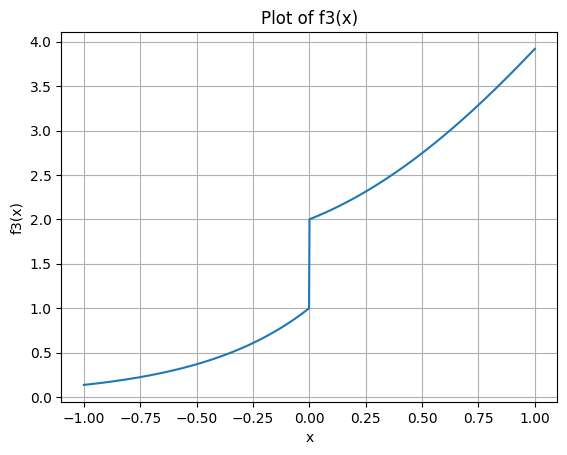

In [5]:
# plot of the function
x_vals = np.linspace(-1, 1, 1000)
y_vals = f3_vectorized(x_vals)
plt.plot(x_vals, y_vals)
plt.title("Plot of f3(x)")
plt.xlabel("x")
plt.ylabel("f3(x)")
plt.grid()
plt.show()

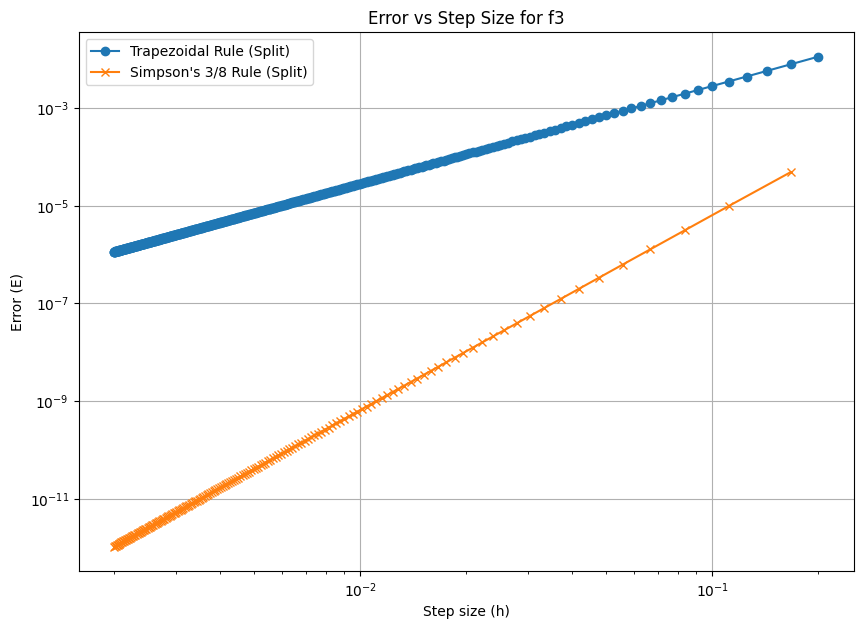

In [6]:
# to avoid the zigzag pattern, i will split the integral to 2 parts at x=0 and compute it

def f3_part1(x):  # [-1, 0]
    return np.exp(2 * x)

def f3_part2(x):  # [0, 1]
    return x - 2 * np.cos(x) + 4

analytical_f3_split = quad(f3_part1, -1, 0)[0] + quad(f3_part2, 0, 1)[0]

errors_trapezoidal_f3_split = []
errors_simpsons_f3_split = []
h_values_f3_split = []

for n in n_values:
    h1 = (0 - (-1)) / n  # Step size for [-1, 0]
    h2 = (1 - 0) / n     # Step size for [0, 1]
    h_values_f3_split.append(max(h1, h2))
    
    # Trapezoidal Rule
    num_trapezoidal_f3_split = (
        trapezoidal_rule(f3_part1, -1, 0, n) +
        trapezoidal_rule(f3_part2, 0, 1, n)
    )
    errors_trapezoidal_f3_split.append(abs(analytical_f3_split - num_trapezoidal_f3_split))
    
    # Simpson's
    if n % 3 == 0:
        num_simpsons_f3_split = (
            simpsons_3_8_rule(f3_part1, -1, 0, n) +
            simpsons_3_8_rule(f3_part2, 0, 1, n)
        )
        errors_simpsons_f3_split.append(abs(analytical_f3_split - num_simpsons_f3_split))
    else:
        errors_simpsons_f3_split.append(None)

plt.figure(figsize=(10, 7))
plt.loglog(h_values_f3_split, errors_trapezoidal_f3_split, label='Trapezoidal Rule (Split)', marker='o')
plt.loglog(
    [h_values_f3_split[i] for i in range(len(n_values)) if n_values[i] % 3 == 0],
    [e for e in errors_simpsons_f3_split if e is not None],
    label="Simpson's 3/8 Rule (Split)",
    marker='x'
)
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title('Error vs Step Size for f3')
plt.legend()
plt.grid()
plt.show()


Trapezoidal Rule Slope: 2.00
Simpson's 3/8 Rule Slope: 4.00


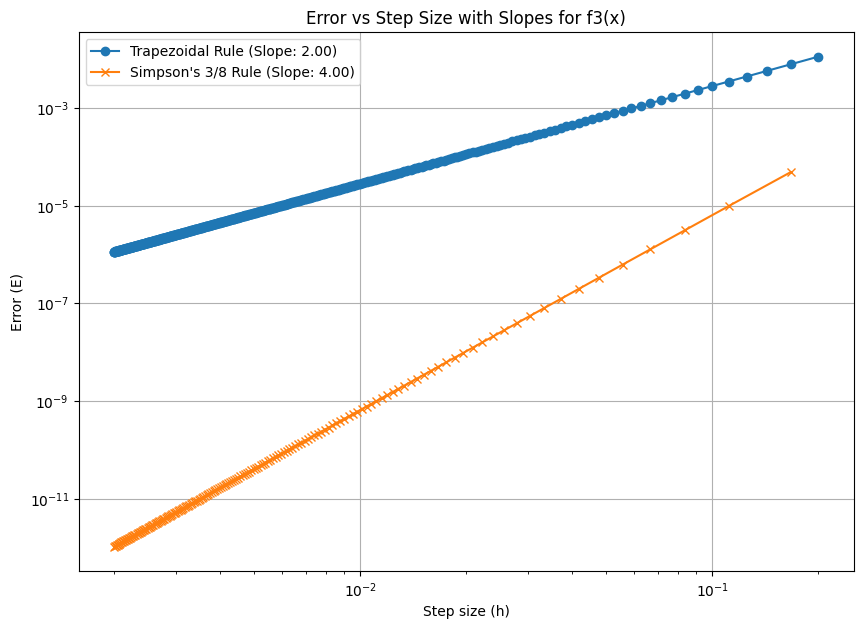

In [7]:
# code for the slope calculation

from scipy.stats import linregress

def compute_slope(log_h_values, log_error_values, method_name):
    slope, intercept, r_value, p_value, std_err = linregress(log_h_values, log_error_values)
    print(f"{method_name} Slope: {slope:.2f}")
    return slope

log_h_trap = np.log(h_values_f3_split)
log_error_trap = np.log(errors_trapezoidal_f3_split)

log_h_simp = np.log([h_values_f3_split[i] for i in range(len(n_values)) if n_values[i] % 3 == 0])
log_error_simp = np.log([e for e in errors_simpsons_f3_split if e is not None])

slope_trap = compute_slope(log_h_trap, log_error_trap, "Trapezoidal Rule")
slope_simp = compute_slope(log_h_simp, log_error_simp, "Simpson's 3/8 Rule")

plt.figure(figsize=(10, 7))
plt.loglog(h_values_f3_split, errors_trapezoidal_f3_split, label=f'Trapezoidal Rule (Slope: {slope_trap:.2f})', marker='o')
plt.loglog(
    [h_values_f3_split[i] for i in range(len(n_values)) if n_values[i] % 3 == 0],
    [e for e in errors_simpsons_f3_split if e is not None],
    label=f"Simpson's 3/8 Rule (Slope: {slope_simp:.2f})",
    marker='x'
)
plt.xlabel('Step size (h)')
plt.ylabel('Error (E)')
plt.title('Error vs Step Size with Slopes for f3(x)')
plt.legend()
plt.grid()
plt.show()


Question A : as expected slopes of the curves matches with the convergence rate of second-order and  fourth-order. Discontinuies can cause a 
mismatch which i resolved with splitting the equation 3.  for SImpson's specifically n divisible by 3 is needed so that can be a cause for mismatch.
with small h, prevision can become a problem with floating errors creeping in.

Question B : Gauss-Legendre Quadrature and Romberg Integration are candidates. GLQ uses roots of Legendre polynomials to minimize error. 
outperforms Trapezoidal and Simpson’s for smooth functions with a small number of points. Romberg combines Trapezoidal with Richardson extrapolation
and results in accelereted convergence rates. 
For sinusodial function, we can use specilized methods such as Clenshaw-Curtis Quadrature (uses Chebyshev nodes) and Filon’s Method 
(designed speficially for integrals of the form of e^iwx * fx)
For discontinous functions we can use Adaptive Quadrature with adjusting the h to calculate more precisely near the discontinuty. or we can use 
Gaussian Quadrature with piecewiseing the 
